#Reto Spaceship Titanic
####Equipo **Ciete**
####Integrantes:
 - Benjamín Ruiz
 - Andrea Díaz
 - Jacqueline Zavala
 - Aldo Sandoval
 - Diana Cañibe

## 1. Entendimiento del negocio

Para la primer etapa es necesario comprender el reto y la información proporcionada para el mismo en Kaggle. \
Empezando por leer el contexto y estudiar las variables proporcionadas y a lo que refiere cada una de ellas.


En esta competencia, la tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado del barco.

Descripciones de archivos y campos de datos

A) train.csv : registros personales de aproximadamente dos tercios (~ 8700) de los pasajeros, que se utilizarán como datos de capacitación.
1. PassengerId- Un Id único para cada pasajero. Cada Id toma la forma gggg_ppdonde ggggindica un grupo con el que viaja el pasajero y ppes su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.
2. HomePlanet- El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
3. CryoSleep- Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
4. Cabin- El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde sidepuede ser Ppor Babor o Spor Estribor .
5. Destination- El planeta al que desembarcará el pasajero.
6. Age- La edad del pasajero.
7. VIP- Si el pasajero ha pagado por servicio VIP especial durante el viaje.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic .
8. Name- El nombre y apellido del pasajero.
9. Transported- Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

B) test.csv : registros personales del tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Su tarea es predecir el valor de Transportedpara los pasajeros en este conjunto.

C) sample_submission.csv : un archivo de envío en el formato correcto.
1. PassengerId- Id para cada pasajero en el conjunto de prueba.
2. Transported- El objetivo. Para cada pasajero, prediga Trueo False.

##Obtener los datos directamente de Kaggle.

In [ ]:
# Descargar los datos en una linea (Aldo Tips) usando tranfer.sh
!wget https://transfer.sh/AyrT1C/train.csv

--2022-09-03 00:12:46--  https://transfer.sh/AyrT1C/train.csv
Resolving transfer.sh (transfer.sh)... 144.76.136.153, 2a01:4f8:200:1097::2
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 805421 (787K) [text/csv]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>] 786.54K  1.84MB/s    in 0.4s    

2022-09-03 00:12:48 (1.84 MB/s) - ‘train.csv.1’ saved [805421/805421]



In [ ]:
#Instalación de Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andreavianeydiaz","key":"620892ff1753cc38c2a2ab095204f2e4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Descarga del set de datos
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 93.3MB/s]


In [ ]:
!unzip spaceship-titanic.zip -d "/content/kaggledb"

Archive:  spaceship-titanic.zip
  inflating: /content/kaggledb/sample_submission.csv  
  inflating: /content/kaggledb/test.csv  
  inflating: /content/kaggledb/train.csv  


> Importar librerías necesarias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Multiple output

In [ ]:
#Carga de datos a un DataFrame
#df = pd.read_csv("/content/kaggledb/train.csv")
df = pd.read_csv("train.csv")

## 2. Entendimiento de los datos

Posterior a la descarga, podemos proceder a hacer una exploración inicial de los datos previa a su preprocesamiento, con el fin de conocer más información sobre los mismos; como tipo de dato, cantidad, etc. 

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 3. Preparación de los datos

Una vez que podemos afirmar conocer los datos, empezamos el proceso de limpieza e imputación para poder contar con un set de datos integro y funcional para poder utillizar en los modelos de ML

Lo primero para arreglarlos es revisar los valores faltantes:

In [ ]:
data = df.isna().sum()
print(f'Promedio de faltantes por columna: {data.mean()}')
fig = px.bar(x=data, y=data.index, orientation='h')
fig.update_layout(title_text='Valores Faltantes por Columna', title_x=0.5)

Promedio de faltantes por columna: 166.0


###Separación de variables

Se observa claramente que la variable *Transported* (variable dependiente, apartir de ahora llamada variable "$y$") no tiene valores faltantes por lo que se separará de las demás variables (variables independientes, designadas con la letra $X$ ):

In [ ]:
df_X = df.drop(columns=['Transported'])
df_y = df['Transported']

Se convierte la variable $y$ a valores $1$ y $0$ para que el modelo pueda interpretarla sin problemas.

In [ ]:
df_y = df_y.astype(int)

###Imputar variables categóricas

Ahora, se observa que la mayoría de las variables independientes tienen valores faltantes, por lo que se debe realizar una imputación de estos.\
\
Para las variables categóricas utilizaremos la moda:

In [ ]:
categoric_cols = [col for col in df_X.columns if df_X[col].dtype == 'object']

In [ ]:
for col in categoric_cols:
  mode = df_X[col].mode()[0]
  df_X[col] = df_X[col].fillna(mode)

In [ ]:
df_X.isna().sum()/df_X.shape[0]

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.020591
VIP             0.000000
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.000000
dtype: float64

Al ver los tipos de datos previamente, observamos que las columnas *CryoSleep* y *VIP* tienen valores de **True** y **False**; 
sin embargo, sabemos que su tipo de dato no es ```bool```, es ```object```.\

Ahora que nuestras variables categóricas no tienen valores faltantes podemos convertir las booleanas a ```bool``` y luego a ```int64``` para que nuestro modelo pueda trabajar con ellas.

In [ ]:
df_X[['CryoSleep', 'VIP']] = df_X[['CryoSleep', 'VIP']].astype(bool)
df_X[['CryoSleep', 'VIP']] = df_X[['CryoSleep', 'VIP']].astype(int)
df_X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines


###Imputar variables numéricas

En este caso, hemos decidido eliminar todas a excepción de la edad (*Age*), debido a que las columnas numéricas existentes hacen referencia a el dinero gastado en determinados servicios, sin embargo es una minoría del conjunto total de pasajeros quienes cuentan con este atributo, y llenarlo podría incluir un sesgo a los datos.  

In [ ]:
df_X = df_X.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

Después se utiliza la mediana para llenar los datos faltantes de la variable *Age* (edad):

In [ ]:
age_median = df_X['Age'].median()
age_median

27.0

In [ ]:
df_X['Age'] = df_X['Age'].fillna(age_median)

In [ ]:
df_X.isna().sum()/df_X.shape[0]

PassengerId    0.0
HomePlanet     0.0
CryoSleep      0.0
Cabin          0.0
Destination    0.0
Age            0.0
VIP            0.0
Name           0.0
dtype: float64

Con esto podemos afirmar que ya no hay datos faltantes en el dataset.

###Eliminación de columnas irrelevantes

Hay algunas columnas que no son relevantes para utilizarlas en el modelo,consecuentemente eliminamos el nombre y el id de los pasajeros ya que no son variables representativas de alguna característica relevante al problema:

In [ ]:
df_X = df_X.drop(columns=['Name', 'PassengerId'])

###Codificación de variables categóricas

De las variables restantes hay una en específico que esta compuesta y es necesario separar sus atributos en nuevas columnas para que puedan incluirse en el modelo. 

Para la codificación primero se debe notar que la variable Cabin viene en un formato de **deck/num/side** donde:
- deck: representa la plataforma en la que se encuentra la cabina.
- num: el número de la cabina.
- side: S - estribor, y P - puerto.

De estos tres datos el número de cabina no es relevante al problema, debido a que cuenta con una variedad alta de valores que podrían causar ruido en el modelo, por lo que no se tomará en cuenta. Por otro lado, *deck* y *side* sí se tomarán en cuenta ya que el lugar en el que se encontraba la persona sí puede influir en el resultado. \
\
Para poder identificar estas dos variables se crearan dos columnas nuevas para cada una de ellas:

In [ ]:
df_X['Deck'] = df_X['Cabin'].str.split('/', expand=True)[0]
df_X['Side'] = df_X['Cabin'].str.split('/', expand=True)[2]
df_X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Deck,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,B,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,F,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,A,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,A,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,F,S


Ahora se eliminará la variable *Cabin* ya que no nos da información relevante por sí sola:

In [ ]:
df_X = df_X.drop(columns=['Cabin'])

Con las modificaciones anteriores las variables categóricas están listas para ser codificadas. Primero se tienen que identificar los diferentes valores que tiene cada variable para saber qué tipo de codificación se utilizará.

In [ ]:
categoric_cols = [col for col in df_X.columns if df_X[col].dtype == 'object']
for col in categoric_cols:
  print(f'{col}: {df_X[col].unique()}')

HomePlanet: ['Europa' 'Earth' 'Mars']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Deck: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Side: ['P' 'S']


Las variables *HomePlanet*, *Destination* y *Side* tienen pocos valores distintos (entre 2 y 3), por lo que se puede utilizar **One-Hot Encode** para su codificación. Por otro lado, la variable *Deck* tiene $8$ valores únicos, así que se usa **Label Encoding** para su codificación:

In [ ]:
df_X = pd.get_dummies(df_X, columns=['HomePlanet', 'Destination', 'Side'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_X['Deck'] = label_encoder.fit_transform(df_X['Deck'])

# Crear un diccionario para identificar fácilmente la codificación
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Transformarlo en dataframe
print(pd.DataFrame(list(le_name_mapping.items()),
                   columns=['Category', 'Label']))

  Category  Label
0        A      0
1        B      1
2        C      2
3        D      3
4        E      4
5        F      5
6        G      6
7        T      7


In [ ]:
df_X.head()

Por último, se usa un mapa de calor para visualizar las correlaciones que hay con el dataset procesado y la variable $y$.

<Figure size 936x576 with 0 Axes>

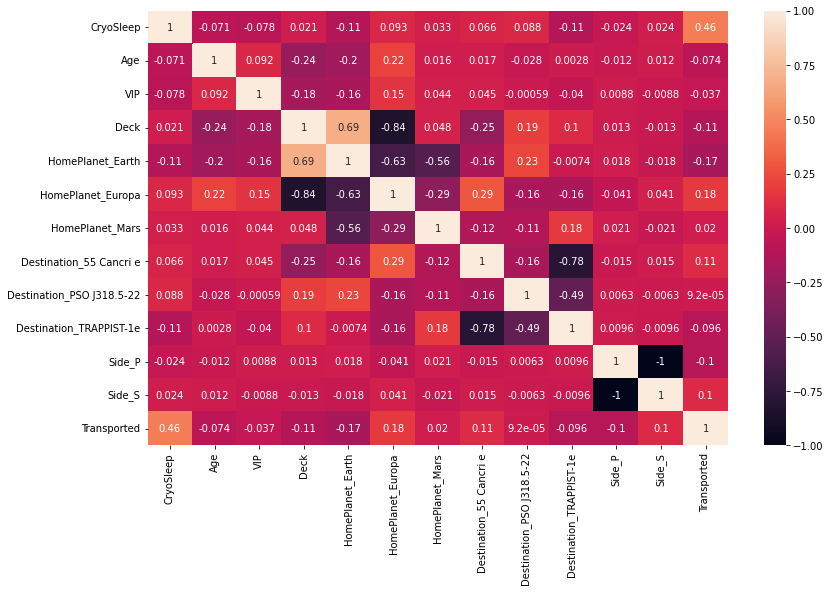

In [ ]:
df_X['Transported'] = df_y
corr = df_X.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True)
plt.show()